# Testing different CAEs and VAEs with experiment dataset

This experiments tests the different implementations of the CAEs and VAEs in ../autoencoders with the experiment dataset defined in ../experiment_datasets/single_point.py to evaluate their performances when reconstructing a single point with variated spatial position.

## Testing Convolutional Autoencoder (CAE)

In [1]:
from autoencoders.CAE import CAE, CAECoordConv
from autoencoders.VAE import VAEBallTrackNoPaddle
from experiment_datasets.single_point import generate_single_point
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


In [3]:
def train_model(ModelClass, dataset, validation, batch_size):
    model = ModelClass(
        layers=2,
        input_shape=INPUT_SHAPE,
        latent_size=8,
        filters=8,
        kernel_size=3,
        name="Model"
    )

    _ = model.train_primitive(
        dataset, 
        validation, 
        epochs=250,
        batch_size=batch_size,
        callbacks=callbacks
    )

    return model.evaluate(validation)



In [4]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=50)
]

losses_cae = []
losses_cae_coord = []
idxs = []

for i in [2**x for x in range(2,6)]:
    dataset, validation = generate_single_point(i, i, validation_split=0.15)
    INPUT_SHAPE = dataset.shape[1:]
    pixels = INPUT_SHAPE[0] * INPUT_SHAPE[1]

    batch_size = dataset.shape[0] if dataset.shape[0] < 32 else 32

    loss = train_model(CAE, dataset, validation, batch_size)
    losses_cae.append(loss)

    loss = train_model(CAECoordConv, dataset, validation, batch_size)
    losses_cae_coord.append(loss)

    idxs.append(i)

    print(f"Size {i} done")


ic: 1.0040
Epoch 186/250
28/28 [==============================] - 1s 31ms/step - loss: 0.0022 - ball_track_metric: 0.9051 - val_loss: 0.0023 - val_ball_track_metric: 0.9294
Epoch 187/250
28/28 [==============================] - 1s 32ms/step - loss: 0.0022 - ball_track_metric: 0.8863 - val_loss: 0.0022 - val_ball_track_metric: 0.9046
Epoch 188/250
28/28 [==============================] - 1s 31ms/step - loss: 0.0022 - ball_track_metric: 0.8805 - val_loss: 0.0022 - val_ball_track_metric: 0.9018
Epoch 189/250
28/28 [==============================] - 1s 31ms/step - loss: 0.0022 - ball_track_metric: 0.8782 - val_loss: 0.0022 - val_ball_track_metric: 0.8966
Epoch 190/250
28/28 [==============================] - 1s 31ms/step - loss: 0.0022 - ball_track_metric: 0.8804 - val_loss: 0.0022 - val_ball_track_metric: 0.8922
Epoch 191/250
28/28 [==============================] - 1s 31ms/step - loss: 0.0022 - ball_track_metric: 0.8785 - val_loss: 0.0022 - val_ball_track_metric: 0.8893
Epoch 192/250
28/

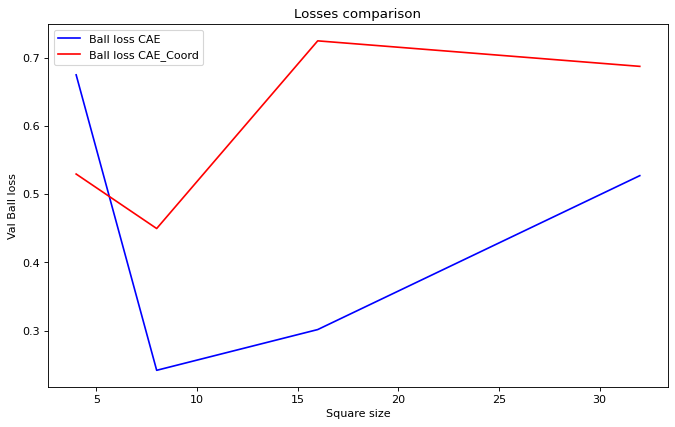

In [5]:
plt.figure(figsize=(10, 6), dpi=80)

# Normalizing ball loss by dividing by the side of a square, since small squares have smaller maximum loss proportional to the size of the square
plt.plot(idxs, [loss["ball_track"] / i for loss, i in zip(losses_cae, idxs)], 'b', label='Ball loss CAE')
plt.plot(idxs, [loss["ball_track"] / i for loss, i in zip(losses_cae_coord, idxs)], 'r', label='Ball loss CAE_Coord')
#plt.plot(idxs, losses_vae_balltrack, 'g', label='Rec loss VAE_Balltrack')
plt.title('Losses comparison')
plt.xlabel('Square size')
plt.ylabel('Val Ball loss')
plt.legend()

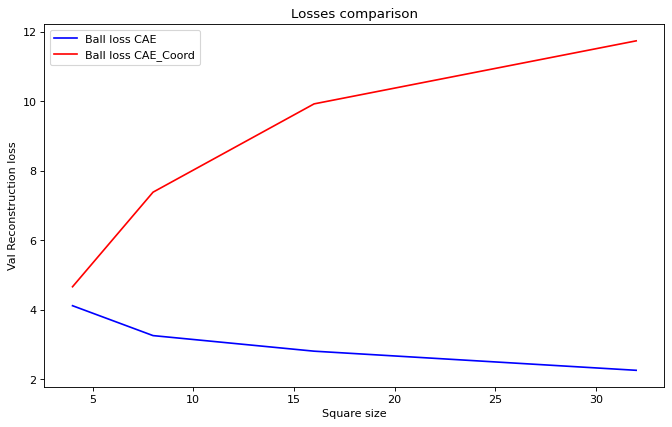

In [6]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(idxs, [loss["reconstruction"] for loss in losses_cae], 'b', label='Ball loss CAE')
plt.plot(idxs, [loss["reconstruction"] for loss in losses_cae_coord], 'r', label='Ball loss CAE_Coord')
#plt.plot(idxs, losses_vae_balltrack, 'g', label='Rec loss VAE_Balltrack')
plt.title('Losses comparison')
plt.xlabel('Square size')
plt.ylabel('Val Reconstruction loss')
plt.legend()